In [1]:
import joblib
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


In [53]:
# ✅ 저장된 모델 로드
loaded_model = joblib.load('lgbm_광어.joblib')

# ✅ 학습 시 사용한 피처 리스트 로드
feature_names = joblib.load('feature_names_광어.pkl')


In [59]:
# ✅ 테스트 데이터 로드
test_data = pd.read_csv("../../../notebooks/데이터_전처리/notnull_광어_price_features.csv") 
test_data['date'] = pd.to_datetime(test_data['date'])  # 날짜 변환
test_data_2025 = test_data[(test_data['date'] >= "2025-01-01") & (test_data['date'] <= "2025-01-31")]


# ✅ 타겟 변수 설정
target_col = 'avgPrice'  # 예측할 가격 컬럼
y_test = test_data_2025[target_col]  # 실제 가격 데이터

# ✅ 학습에 사용된 피처만 선택 (예측용 X_test)
missing_features = [col for col in feature_names if col not in test_data_2025.columns]
if missing_features:
    print("⚠️ 테스트 데이터에 없는 피처:", missing_features)

# ✅ 실제 존재하는 피처만 선택하여 예측
available_features = [col for col in feature_names if col in test_data_2025.columns]
X_test = test_data_2025[available_features]


In [60]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# ✅ 예측 수행
y_pred_test = loaded_model.predict(X_test)

# ✅ 성능 평가 (RMSE, R2, MAE, MAPE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100  # MAPE 계산

# ✅ 평가 결과 출력
print("\n✅ Test 데이터 평가 결과")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.2f}%")



✅ Test 데이터 평가 결과
RMSE: 1289.2181
R²: 0.7974
MAE: 728.4376
MAPE: 1.73%


,Date,Actual Price,Predicted Price
26265,2025-01-01,45000.0,44933.073345
26266,2025-01-01,48340.0,47643.580119
26267,2025-01-01,40000.0,40209.364346
26268,2025-01-01,39770.0,39442.581192
26269,2025-01-01,45000.0,44917.234352
...,...,...,...
26550,2025-01-29,41670.0,41464.355635
26551,2025-01-29,45000.0,44472.858128
26552,2025-01-29,42500.0,42466.366648
26553,2025-01-29,45000.0,45000.589993


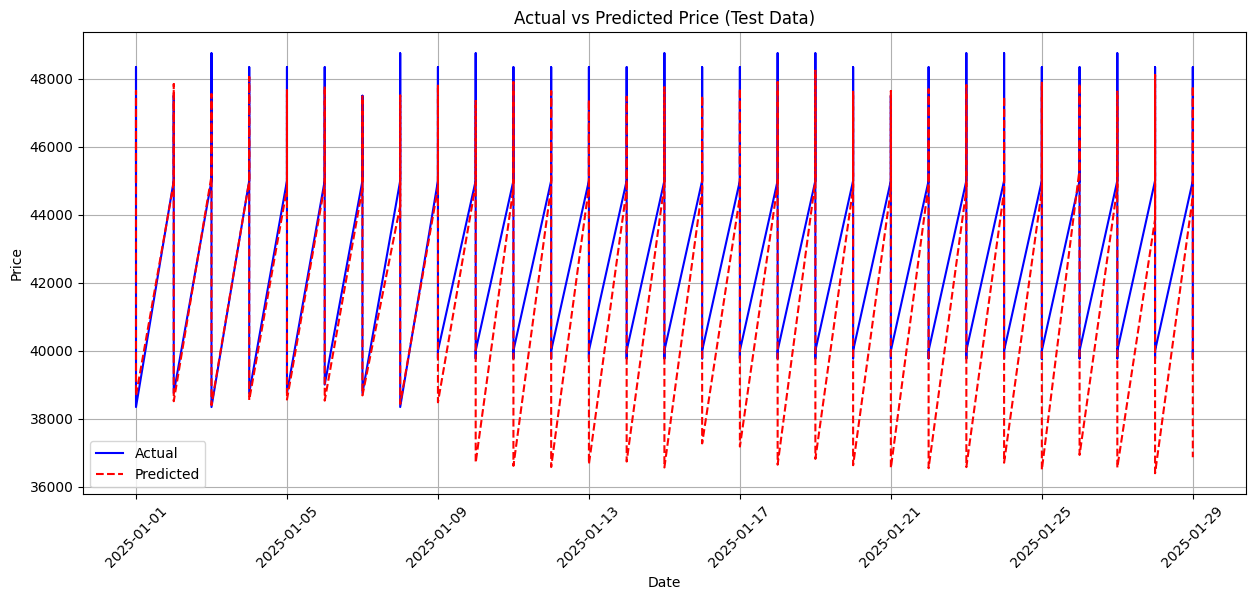

In [61]:
import matplotlib.pyplot as plt

# ✅ 결과 저장 및 시각화
result_df = pd.DataFrame({
    "Date": test_data_2025["date"],  # 테스트 데이터의 날짜
    "Actual Price": y_test.values,
    "Predicted Price": y_pred_test
})

from IPython.display import display

# ✅ 예측 결과 출력
display(result_df)

# ✅ 예측 vs 실제 시각화
plt.figure(figsize=(15, 6))
plt.plot(result_df["Date"], result_df["Actual Price"], label="Actual", color="blue")
plt.plot(result_df["Date"], result_df["Predicted Price"], label="Predicted", color="red", linestyle="--")
plt.title("Actual vs Predicted Price (Test Data)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### 아아아

In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ✅ 저장된 모델 및 피처 로드
loaded_model = joblib.load('lgbm_광어.joblib')
feature_names = joblib.load('feature_names_광어.pkl')


# ✅ 테스트 데이터 로드
test_data = pd.read_csv("../../../notebooks/데이터_전처리/notnull_광어_price_features.csv") 
test_data['date'] = pd.to_datetime(test_data['date'])  # 날짜 변환
test_data_2025 = test_data[(test_data['date'] >= "2025-01-01") & (test_data['date'] <= "2025-01-31")]


# ✅ 타겟 변수 설정
target_col = 'avgPrice'  # 예측할 가격 컬럼
y_test = test_data_2025[target_col]  # 실제 가격 데이터


# ✅ 데이터 기본 확인
# print("📌 데이터프레임 정보:")
# print(test_data_2025.info())

# ✅ 시장 리스트 (컬럼명에 'm_'로 시작하는 것만 선택)
markets = [col for col in test_data_2025.columns if col.startswith("m_")]
print("✅ 시장 리스트:", markets)

# ✅ 타겟 변수 설정
target_col = 'avgPrice'

# ✅ 결과 저장용 리스트
market_metrics = []

# ✅ 시장별 예측 및 성능 평가
for market in markets:
    # 시장별 데이터 필터링
    market_data = test_data_2025[test_data_2025[market] == 1]
    
    if not market_data.empty:  # 데이터가 존재할 경우에만 수행
        X_test = market_data[feature_names]  # 학습된 피처만 사용
        y_test = market_data[target_col]      # 실제 가격
        
        # 예측 수행
        y_pred = loaded_model.predict(X_test)
        
        # 성능 평가 (R², RMSE)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        # 결과 저장
        market_metrics.append({
            'Market': market,
            'R2': r2,
            'RMSE': rmse,
            'Count': len(market_data)  # 데이터 개수
        })
        

# ✅ 결과 데이터프레임 생성
metrics_df = pd.DataFrame(market_metrics)

# ✅ 시장별 평균 R² 및 RMSE 계산
mean_r2 = metrics_df['R2'].mean()
mean_rmse = metrics_df['RMSE'].mean()

# ✅ 결과 출력
# ✅ 시장별 성능 평가 결과 확인
display(metrics_df)


print(f"\n📊 전체 시장 평균 R²: {mean_r2:.4f}")
print(f"📊 전체 시장 평균 RMSE: {mean_rmse:.4f}")


✅ 시장 리스트: ['m_가락시장', 'm_강서농수산물시장', 'm_구리농수산물시장', 'm_노량진시장', 'm_마포농수산물시장', 'm_부산민락어민활어직판장', 'm_소래포구종합어시장', 'm_수원농수산물시장', 'm_안양평촌농수산물시장', 'm_인천종합연안부두어시장']
[{'Market': 'm_가락시장', 'R2': 0.0, 'RMSE': 334.1713689774868, 'Count': 29}, {'Market': 'm_강서농수산물시장', 'R2': -3.9532183691795595, 'RMSE': 782.23569354728, 'Count': 29}, {'Market': 'm_구리농수산물시장', 'R2': 0.0, 'RMSE': 148.03320953415817, 'Count': 29}, {'Market': 'm_노량진시장', 'R2': -1503.997438855549, 'RMSE': 336.3012036356551, 'Count': 29}, {'Market': 'm_마포농수산물시장', 'R2': 0.0, 'RMSE': 199.6593863895075, 'Count': 29}, {'Market': 'm_부산민락어민활어직판장', 'R2': -0.10642083357132992, 'RMSE': 716.5693420737911, 'Count': 29}, {'Market': 'm_소래포구종합어시장', 'R2': -0.7772138738940886, 'RMSE': 2504.927912472243, 'Count': 29}, {'Market': 'm_수원농수산물시장', 'R2': -0.9833845775937282, 'RMSE': 1126.1858145143303, 'Count': 29}, {'Market': 'm_안양평촌농수산물시장', 'R2': 0.0, 'RMSE': 150.59890373998414, 'Count': 29}, {'Market': 'm_인천종합연안부두어시장', 'R2': -18.512686864261113, 'RMSE': 2764.64901

,Market,R2,RMSE,Count
0,m_가락시장,0.000000,334.171369,29
1,m_강서농수산물시장,-3.953218,782.235694,29
2,m_구리농수산물시장,0.000000,148.033210,29
3,m_노량진시장,-1503.997439,336.301204,29
4,m_마포농수산물시장,0.000000,199.659386,29
5,m_부산민락어민활어직판장,-0.106421,716.569342,29
6,m_소래포구종합어시장,-0.777214,2504.927912,29
7,m_수원농수산물시장,-0.983385,1126.185815,29
8,m_안양평촌농수산물시장,0.000000,150.598904,29
9,m_인천종합연안부두어시장,-18.512687,2764.649015,29



📊 전체 시장 평균 R²: -152.8330
📊 전체 시장 평균 RMSE: 906.3332


In [15]:
market_date_metrics = []
# ✅ 일자별 성능 평가
date_metrics = []

# ✅ 일자별 루프
for date, group in test_data_2025.groupby('date'):
    X_test = group[feature_names]
    y_test = group[target_col]
    
    if not X_test.empty:
        y_pred = loaded_model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        date_metrics.append({
            'Date': date,
            'R2': r2,
            'RMSE': rmse,
            'Count': len(group)
        })

# ✅ 일자별 결과 데이터프레임 생성
date_metrics_df = pd.DataFrame(date_metrics)

# ✅ 일자별 평균 R² 및 RMSE 계산
mean_date_r2 = date_metrics_df['R2'].mean()
mean_date_rmse = date_metrics_df['RMSE'].mean()

# ✅ 일자별 성능 평가 결과 확인
display(date_metrics_df)

print(f"\n📅 전체 일자 평균 R²: {mean_date_r2:.4f}")
print(f"📅 전체 일자 평균 RMSE: {mean_date_rmse:.4f}")


,Date,R2,RMSE,Count
0,2025-01-01,0.800737,1321.527045,10
1,2025-01-02,0.790083,1306.206460,10
2,2025-01-03,0.956930,636.220266,10
3,2025-01-04,0.993031,242.103559,10
4,2025-01-05,0.989984,291.884345,10
5,2025-01-06,0.787605,1351.284696,10
6,2025-01-07,0.885221,909.658792,10
7,2025-01-08,0.958945,632.060602,10
8,2025-01-09,0.725989,1468.087085,10
9,2025-01-10,0.838231,1194.897863,10



📅 전체 일자 평균 R²: 0.7939
📅 전체 일자 평균 RMSE: 1228.2551


In [17]:
market_date_metrics = []

# ✅ 시장 + 날짜별 R² & RMSE 계산
for market in markets:
    for date, date_group in test_data_2025.groupby('date'):
        market_data = date_group[date_group[market] == 1]
        
        if not market_data.empty:
            X_test = market_data[feature_names]
            y_test = market_data["avgPrice"]

            y_pred = loaded_model.predict(X_test)

            r2 = r2_score(y_test, y_pred)
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))

            # ✅ 시장 + 날짜별 결과 저장
            market_date_metrics.append({
                'Market': market,
                'Date': date,
                'R2': r2,
                'RMSE': rmse,
                'Count': len(market_data)
            })
            
market_date_df = pd.DataFrame(market_date_metrics)

# ✅ 시장+날짜별 평균 R² 및 RMSE 계산
mean_market_date_r2 = market_date_df['R2'].mean()
mean_market_date_rmse = market_date_df['RMSE'].mean()


print(f"📊📅 전체 시장+날짜 평균 R²: {mean_market_date_r2:.4f}, 평균 RMSE: {mean_market_date_rmse:.4f}")

c:\Users\user\miniconda3\envs\env311_cu121\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\user\miniconda3\envs\env311_cu121\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\user\miniconda3\envs\env311_cu121\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\user\miniconda3\envs\env311_cu121\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\user\miniconda3\envs\env311_cu121\Lib\site-packages\sklearn\metrics\_regression.py:1187: Un

📊📅 전체 시장+날짜 평균 R²: nan, 평균 RMSE: 728.4376


In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ✅ 저장된 모델 및 피처 로드
loaded_model = joblib.load('lgbm_광어.joblib')
feature_names = joblib.load('feature_names_광어.pkl')


# ✅ 테스트 데이터 로드
test_data = pd.read_csv("../../../notebooks/데이터_전처리/notnull_광어_price_features.csv") 
test_data['date'] = pd.to_datetime(test_data['date'])  # 날짜 변환
test_data_2025 = test_data[(test_data['date'] >= "2025-01-01") & (test_data['date'] <= "2025-01-31")]


# ✅ 타겟 변수 설정
target_col = 'avgPrice'  # 예측할 가격 컬럼
y_test = test_data_2025[target_col]  # 실제 가격 데이터


# ✅ 데이터 기본 확인
# print("📌 데이터프레임 정보:")
# print(test_data_2025.info())

# ✅ 시장 리스트 (컬럼명에 'm_'로 시작하는 것만 선택)
markets = [col for col in test_data_2025.columns if col.startswith("m_")]
print("✅ 시장 리스트:", markets)

# ✅ 타겟 변수 설정
target_col = 'avgPrice'

# ✅ 결과 저장용 리스트
market_metrics = []

# ✅ 시장별 예측 및 성능 평가
for market in markets:
    # 시장별 데이터 필터링
    market_data = test_data_2025[test_data_2025[market] == 1]
    
    if not market_data.empty:  # 데이터가 존재할 경우에만 수행
        X_test = market_data[feature_names]  # 학습된 피처만 사용
        y_test = market_data[target_col]      # 실제 가격
        
        # 예측 수행
        y_pred = loaded_model.predict(X_test)
        
        # 성능 평가 (R², RMSE)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        # 결과 저장
        market_metrics.append({
            'Market': market,
            'R2': r2,
            'RMSE': rmse,
            'Count': len(market_data)  # 데이터 개수
        })
        

# ✅ 결과 데이터프레임 생성
metrics_df = pd.DataFrame(market_metrics)

# ✅ 시장별 평균 R² 및 RMSE 계산
mean_r2 = metrics_df['R2'].mean()
mean_rmse = metrics_df['RMSE'].mean()

# ✅ 결과 출력
# ✅ 시장별 성능 평가 결과 확인
display(metrics_df)


print(f"\n📊 전체 시장 평균 R²: {mean_r2:.4f}")
print(f"📊 전체 시장 평균 RMSE: {mean_rmse:.4f}")


✅ 시장 리스트: ['m_가락시장', 'm_강서농수산물시장', 'm_구리농수산물시장', 'm_노량진시장', 'm_마포농수산물시장', 'm_부산민락어민활어직판장', 'm_소래포구종합어시장', 'm_수원농수산물시장', 'm_안양평촌농수산물시장', 'm_인천종합연안부두어시장']
[{'Market': 'm_가락시장', 'R2': 0.0, 'RMSE': 334.1713689774868, 'Count': 29}, {'Market': 'm_강서농수산물시장', 'R2': -3.9532183691795595, 'RMSE': 782.23569354728, 'Count': 29}, {'Market': 'm_구리농수산물시장', 'R2': 0.0, 'RMSE': 148.03320953415817, 'Count': 29}, {'Market': 'm_노량진시장', 'R2': -1503.997438855549, 'RMSE': 336.3012036356551, 'Count': 29}, {'Market': 'm_마포농수산물시장', 'R2': 0.0, 'RMSE': 199.6593863895075, 'Count': 29}, {'Market': 'm_부산민락어민활어직판장', 'R2': -0.10642083357132992, 'RMSE': 716.5693420737911, 'Count': 29}, {'Market': 'm_소래포구종합어시장', 'R2': -0.7772138738940886, 'RMSE': 2504.927912472243, 'Count': 29}, {'Market': 'm_수원농수산물시장', 'R2': -0.9833845775937282, 'RMSE': 1126.1858145143303, 'Count': 29}, {'Market': 'm_안양평촌농수산물시장', 'R2': 0.0, 'RMSE': 150.59890373998414, 'Count': 29}, {'Market': 'm_인천종합연안부두어시장', 'R2': -18.512686864261113, 'RMSE': 2764.64901

,Market,R2,RMSE,Count
0,m_가락시장,0.000000,334.171369,29
1,m_강서농수산물시장,-3.953218,782.235694,29
2,m_구리농수산물시장,0.000000,148.033210,29
3,m_노량진시장,-1503.997439,336.301204,29
4,m_마포농수산물시장,0.000000,199.659386,29
5,m_부산민락어민활어직판장,-0.106421,716.569342,29
6,m_소래포구종합어시장,-0.777214,2504.927912,29
7,m_수원농수산물시장,-0.983385,1126.185815,29
8,m_안양평촌농수산물시장,0.000000,150.598904,29
9,m_인천종합연안부두어시장,-18.512687,2764.649015,29



📊 전체 시장 평균 R²: -152.8330
📊 전체 시장 평균 RMSE: 906.3332


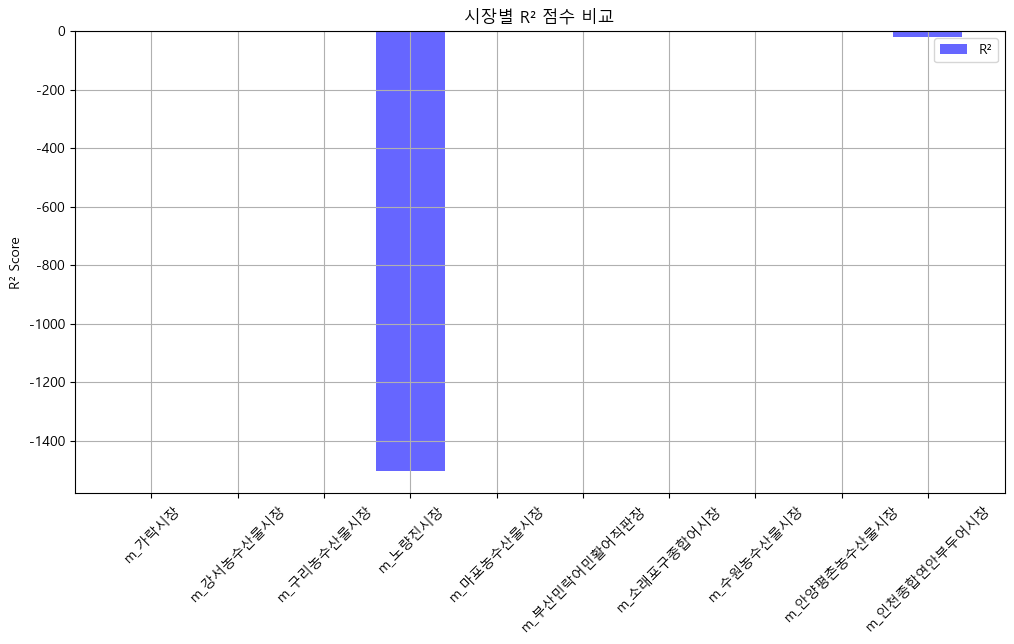

In [5]:
import matplotlib.pyplot as plt

# ✅ 시장별 성능 시각화
plt.figure(figsize=(12, 6))
plt.bar(metrics_df["Market"], metrics_df["R2"], color='blue', alpha=0.6, label="R²")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.title("시장별 R² 점수 비교")
plt.legend()
plt.grid()
plt.show()



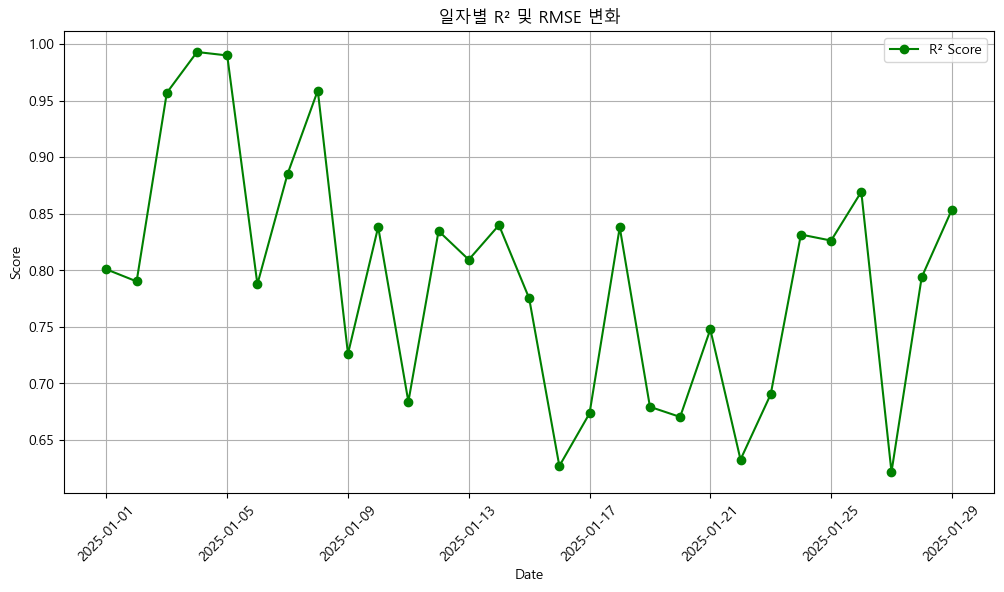

In [7]:
# ✅ 일자별 성능 시각화
plt.figure(figsize=(12, 6))
plt.plot(date_metrics_df["Date"], date_metrics_df["R2"], marker='o', linestyle='-', color='green', label="R² Score")
plt.xlabel("Date")
plt.ylabel("Score")
plt.title("일자별 R² 및 RMSE 변화")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

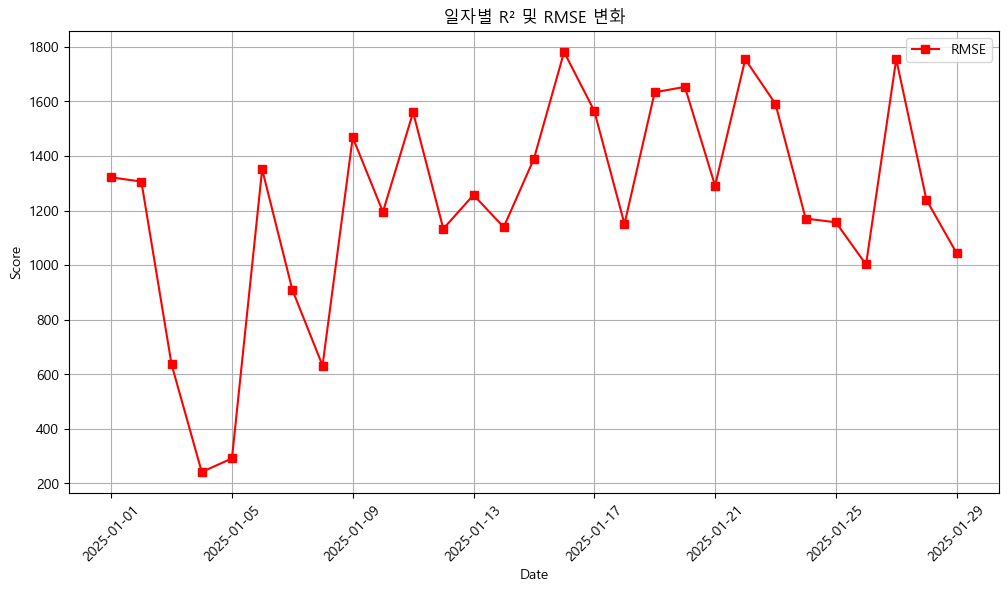

In [8]:
# ✅ 일자별 성능 시각화
plt.figure(figsize=(12, 6))

plt.plot(date_metrics_df["Date"], date_metrics_df["RMSE"], marker='s', linestyle='-', color='red', label="RMSE")
plt.xlabel("Date")
plt.ylabel("Score")
plt.title("일자별 R² 및 RMSE 변화")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [18]:
import pandas as pd
import joblib
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# ✅ 모델 및 피처 로드
loaded_model = joblib.load('lgbm_광어.joblib')
feature_names = joblib.load('feature_names_광어.pkl')

# ✅ 테스트 데이터 로드
test_data = pd.read_csv("../../../notebooks/데이터_전처리/notnull_광어_price_features.csv")
test_data['date'] = pd.to_datetime(test_data['date'])
test_data_2025 = test_data[(test_data['date'] >= "2025-01-01") & (test_data['date'] <= "2025-01-31")]

# ✅ 피처 확인 및 수정
missing_features = [col for col in feature_names if col not in test_data_2025.columns]
if missing_features:
    print("❌ 테스트 데이터에 없는 피처:", missing_features)

available_features = [col for col in feature_names if col in test_data_2025.columns]

# ✅ 시장 리스트
markets = [col for col in test_data_2025.columns if col.startswith("m_")]
print("✅ 시장 리스트:", markets)

# ✅ 결과 저장용 리스트
market_metrics = []

# ✅ 시장별 예측 및 성능 평가
for market in markets:
    market_data = test_data_2025[test_data_2025[market] == 1]

    if not market_data.empty:
        # ✅ 피처 선택 및 인덱스 정리
        X_test = market_data[available_features].reset_index(drop=True)
        y_test = market_data['avgPrice'].reset_index(drop=True)

        # ✅ 예측 수행
        y_pred = loaded_model.predict(X_test)

        # ✅ 예측된 값과 실제 값 확인
        print(f"\n📌 {market} 시장 예측 결과 샘플:")
        print("🔹 실제 값:", y_test.head().values)
        print("🔹 예측 값:", y_pred[:5])

        # ✅ 성능 평가
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        # ✅ 결과 저장
        market_metrics.append({
            'Market': market,
            'R2': r2,
            'RMSE': rmse,
            'Count': len(market_data)
        })

# ✅ 결과 데이터프레임 생성
metrics_df = pd.DataFrame(market_metrics)

# ✅ 시장별 평균 R² 및 RMSE 계산
mean_r2 = metrics_df['R2'].mean()
mean_rmse = metrics_df['RMSE'].mean()

# ✅ 결과 출력
print("\n📊 시장별 성능 평가 결과")
print(metrics_df)
print(f"\n📊 전체 시장 평균 R²: {mean_r2:.4f}")
print(f"📊 전체 시장 평균 RMSE: {mean_rmse:.4f}")


✅ 시장 리스트: ['m_가락시장', 'm_강서농수산물시장', 'm_구리농수산물시장', 'm_노량진시장', 'm_마포농수산물시장', 'm_부산민락어민활어직판장', 'm_소래포구종합어시장', 'm_수원농수산물시장', 'm_안양평촌농수산물시장', 'm_인천종합연안부두어시장']

📌 m_가락시장 시장 예측 결과 샘플:
🔹 실제 값: [45000. 45000. 45000. 45000. 45000.]
🔹 예측 값: [44933.07334528 44934.40161906 45136.35833905 44994.61549622
 44769.99957181]

📌 m_강서농수산물시장 시장 예측 결과 샘플:
🔹 실제 값: [48340. 47500. 48750. 48340. 48340.]
🔹 예측 값: [47643.58011857 47842.1803234  47546.15250196 48052.13578959
 47657.58486409]

📌 m_구리농수산물시장 시장 예측 결과 샘플:
🔹 실제 값: [40000. 40000. 40000. 40000. 40000.]
🔹 예측 값: [40209.36434557 40153.6121704  40162.68491071 40188.81004939
 40113.20406957]

📌 m_노량진시장 시장 예측 결과 샘플:
🔹 실제 값: [39770. 39770. 39770. 39770. 39770.]
🔹 예측 값: [39442.5811922  39420.1367488  39505.15518659 39531.28032528
 39443.18463488]

📌 m_마포농수산물시장 시장 예측 결과 샘플:
🔹 실제 값: [45000. 45000. 45000. 45000. 45000.]
🔹 예측 값: [44917.23435235 44958.07558181 44992.16432029 45018.28945898
 44791.03337755]

📌 m_부산민락어민활어직판장 시장 예측 결과 샘플:
🔹 실제 값: [42500. 41250. 41000. 4167